# Text Classification with Supervised Machine Learning

The goal of text classification is to categorize texts into any number of predefined categories. This method is most similar to traditional content analysis, or text coding, in that it does the same thing as a team of trained coders: place texts into categories. 

### Learning Goals
* Get comfortable with the basic vocabulary of text classification
* Understand the intuition behind supervised machine learning
* Learn how to implement a few key supervised machine learning algorithms
* Understand how to test for accuracy
* Use scikit-learn to identify important features for each category
* Gain the foundational knowledge for continued learning

### Outline

0. What text classification looks like
1. The basics
2. Reading in and pre-processing data
3. Training and test sets
4. Supervised Machine Learning Classification
5. Prediction
6. Cross Validation
7. Identifying Features

### Key Terms

* *supervised machine learning* :
    * using machine learning to infer documents' classifications from labeled training data
* *model training* :
    * using a machine learning algorithm to train a classifier to predict categories on unseen sets
* *features*:
    * way of representing the object that will be classified. For images, features are often pixels. For text, features are usually word counts or weighted word counts, but they can also be things like a word's part of speech, proportion of capitals, or specific words that are used.
* *vectorization*:
    * converting natural language documents into numbers that can be fed into a classifier. Usually this means converting a corpus into a Document-Term Matrix, containing raw counts or weighted proportions (like TF-IDF).
* *train-test split*:
    * dividing labeled data into a training set and a test set. Often done once in supervised machine learning model training, but can be done several times independently as in cross-validation
* *training set*:
    * a selection of labeled data that is used to train the machine learning algorithm
* *test set*:
    * a selection of labeled data that is used to test the accuracy of the machine learning algorithm
* *unseen set*:
    * a selection of *unlabeled* data - the machine learning algorithm predicts the label for these data. Also called the *holdout set*
* *accuracy*:
    * the proportion of texts an algorithm correctly classifies
* *cross-validation*:
    * a way to assess the performance of an algorithm on an unseen data set. Essentially this repeats a train-test split several times and averages the result of these independent slices, giving a superior estimation of model accuracy compared to a single train-test split
    
### Additional Resources:

- [Documentation](http://scikit-learn.org/stable/supervised_learning.html) for supervised machine learning using scikit-learn
- [Identifying what types of blog posts are censored in China](http://gking.harvard.edu/publications/how-censorship-china-allows-government-criticism-silences-collective-expression), using supervised machine learning, by Gary King, Jennifer Pan, and Margaret E Roberts
- [Literary Pattern Recognition](https://lucian.uchicago.edu/blogs/literarynetworks/files/2015/12/LONG_SO_CI.pdf), by Hoyt Long, Richard So
- [How Quickly Do Literary Standards Change?](https://tedunderwood.com/2015/05/18/how-quickly-do-literary-standards-change/), by Ted Underwood, Jordan Sellers

## What text classification looks like<a id='example'></a>

Imagine that you work at [YouTube](https://www.youtube.com/) (if you haven't heard of it, YouTube is a video-sharing website). Your job is to remove comments on videos that are spam (unsolicited and inappropriate comments). You look through each video and read the comments yourself, deciding which are spam and which are not spam. Perhaps you see comments like those below. Which would you consider to be spam and which not spam?

- _Hey @dancer317, love ur videos so much! Thanks for all the tips on dancing!_
- _OUR  LASER PRINTER/FAX/COPIER TONER CARTRIDGE PRICES NOW AS LOW AS 39 DOLLARS. SPECIALS WEEKLY ON ALL LASER PRINTER SUPPLIES. WE CARRY MOST ALL LASER PRINTER CARTRIDGES, FAX SUPPLIES AND COPIER TONERS AT WAREHOUSE PRICES_
- _I'm not sold on your first point about crossing national boundaries, but I see what you mean about non-economic alternatives._
- _Some of the most beautiful women in the world bare it all for you. Denise Richards, Britney  Spears, Jessica Simpson, and many more. CLICK HERE FOR NUDE CELEBS_

How did you decide which were spam and which weren't? Maybe one thing you noted was the high number of words in all capitals. The topics can also give you a clue, as the spam-like comments talk about selling things and nudity, which are often found in spam comments.

However you decided, we can think about the task you were doing like this:

<img src='../assets/human-classification.jpg' />

You took a comment written in English, and you classified it into one of two classes: spam or not spam. This is text classification, performed by a human. Wouldn't it be nice to have a computer do this for you? That would look like this: 

<img src='../assets/computer-classification.jpg' />

How are we going to do this? We could count the number of times each YouTube comment mentions nudity or tries to sell something, and we could measure the proportion of capital letters. Using this approach, we would get two numbers for each comment, one for each of these _features_. We could also use your human judgements in a third column telling us whether that comment is spam or not.

| Comment                                                 | Selling or nudity | Proportion capital letters | Is it spam? |
|---------------------------------------------------------|-------------------|----------------------------|-------------|
| Hey @dancer317, love ur videos so much! Thanks for ...  | 0                 | 0.1                        | No          |
| OUR LASER PRINTER/FAX/COPIER TONER CARTRIDGE PRICES ... | 4                 | 1.0                        | Yes         |
| I'm not sold on your first point ...                    | 1                 | 0.05                       | No          |
|  Some of the most beautiful women in the world ...      | 3                 | 0.15                       | Yes         |

We can treat these two numbers as geometric coordinates and plot them, with spam comments in red and non-spam comments in green, like so:

<img src='../assets/classification-no-line.jpg' />

<img src='../assets/classification-with-line.jpg' />


## The basics<a id='basics'></a>

Text classification requires labeled text, or text that is already categorized into predefined categories. In some cases, this is built into the data; in others, the labels are assigned by hand. Once we have a good number of labeled texts, usually between 200 and 500, we can use supervised machine learning algorithms to train a computer to recognize the categories and place the remaining, un-coded texts into a category. This method has two benefits: (1) It allows us to scale our coding up almost indefinitely, and (2) it identifies what *features* (in our case, words) are most defining of each category. This can help us learn more about the content of our categories.

Text classification involves two primary tasks:
- **Turning natural language into numbers.** (This is called _vectorization_.)
- **Training a classifier to use those numbers and distinguish between the classes.**

This is distinct from inductive natural language processing methods--such as topic modeling, which discover the categories making up texts rather than defining them from the outset. If you're testing hypotheses about buckets or categories of texts, you'll usually use classification; if you're exploring in the dark, you'll use a more exploratory method. Text categories to classify can also include genre, language, author, or [affective states][1].

[1]: https://en.wikipedia.org/wiki/Affect_(psychology)

Many applied natural language processing problems can be tackled as text classification:

- [Sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)
- Genre classification
- Language identification
- Authorship attribution
- Is this document relevant to this legal case?
- Is the patient in need of urgent care?


### 0. Reading in and pre-processing data

In [1]:
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
sns.set()

## EDA <a id='eda'></a>

In [4]:
DATA_DIR = '../../classification-intro-bacon-fa18/data'
fname = os.path.join(DATA_DIR, 'tweets.csv')
df = pd.read_csv(fname)
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


Which airlines are tweeted about and how many of each in this dataset?

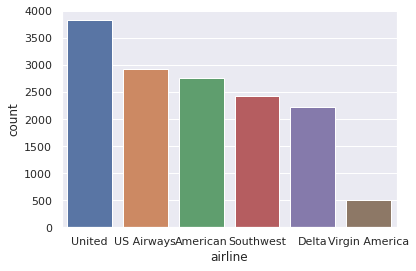

In [5]:
sns.countplot(df['airline'], order=df['airline'].value_counts().index);

### Challenge

- How many tweets are in the dataset?
- How many tweets are positive, neutral and negative?
- What **proportion** of tweets are positive, neutral and negative?
- Visualize these last two questions.

### Extra challenge

- When did the tweets come from?
- Who gets more retweets: positive, negative or neutral tweets?
- What are the reasons why people tweet negatively? Show distribution.


## Preprocess  <a id='preprocess'></a>

### Regular expressions

Regular expressions are like advanced find-and-replace. They allow us to specify complicated patterns in text data and find all the matches. They are very useful in text processing. You can learn more about them [here](https://github.com/geoffbacon/regular-expressions-in-python).

We can use regular expressions to find hashtags and user mentions in a tweet. We first write the pattern we're looking for as a (raw) string, using regular expression's special syntax. The `twitter_handle_pattern` says "find me a @ sign immediately followed by one or more upper or lower case letters, digits or underscore". The `hashtag_pattern` is a little more complicated; it says "find me exactly one ＃ or #, immediately followed by one or more upper or lower case letters, digits or underscore, but only if it's at the beginning of a line or immediately after a whitespace character".

In [ ]:
import re
twitter_handle_pattern = r'@(\w+)'
hashtag_pattern = r'(?:^|\s)[＃#]{1}(\w+)'
url_pattern = r'https?:\/\/.*.com'
example_tweet = "lol @justinbeiber and @BillGates are like soo #yesterday #amiright saw it on https://twitter.com #yolo"

In [ ]:
re.findall(twitter_handle_pattern, example_tweet)

In [ ]:
re.findall(hashtag_pattern, example_tweet)

In [ ]:
re.findall(url_pattern, example_tweet)

`pandas` has great in-built support for operating with regular expressions on columns. We can `extract` all user mentions from a column of text like this:

In [ ]:
df['text'].str.extract(twitter_handle_pattern).head(10)

And find all the hashtags like this:

In [ ]:
df['text'].str.extract(hashtag_pattern).head(20)

### Challenge

Often in preprocessing text data, we don't care about the exact hashtag/user/URL that someone used (although sometimes we do!). Your job is to replace all the hashtags with `'HASHTAG'`, the user mentions with `'USER'` and URLs with `'URL'`. To do this, you'll use the `replace` string method of the `text` column. The result of this will be a series, which you should add to `df` as a column called `clean_text`. **See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html) for more information on the method.**

# Classification

## Logistic regression with binary class

To understand the theoretical gist of our classification task, let's first focus on a binary 'positive vs negative' classifier. We are going to do so by restricting the analysis to the non-neutral tweets.

In [ ]:
df_bin=df[df['airline_sentiment']!='neutral']
len(df_bin)

### Bag of words and DTM

First, we need to turn the text into numbers for our classifier. We're going to use a "bag of words" as our features. A bag of words is just like a frequency count of all the words that appear in a tweet. It's called a bag because we ignore the order of the words; we just care about what words are in the tweet. To do this, we can use `scikit-learn`'s `CountVectorizer` to build up the document-term matrix (see notebook from day 2).

In [ ]:
countvectorizer = CountVectorizer(max_features=5000, binary=True)
X = countvectorizer.fit_transform(df_bin['clean_text'])
features = X.toarray()
features

In [ ]:
response = df_bin['airline_sentiment'].values
response

### Split into train/test datasets

We don't want to train our classifier on the same dataset that we test it on, so let's split it into training and test sets.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, response, test_size=0.2)
y_train

### Fit a logistic regression model

OK, so now that we've turned our data into numbers, we're ready to feed it into a classifier. More specifically, we are going to fit a logistic regression model where the probability of being positive ($y=1$) is described by a sigmoid function of the form:
$f(X)=P(y=1|X)=\frac{exp(-X'\theta)}{1+exp(-X'\theta)}$. Once $\theta$ - a vector of word _weights_ or _loadings_ - is estimated we can get predict outcomes $\hat{f}$ conditional on observed word count $X$. If $\hat{f}>0.5$ then the observation is classified as positive. This is a _linear classifier_ as the decision boundary is defined by $\frac{exp(-X'\theta)}{1+exp(-X'\theta)}=0.5$, which after reaaranging and taking logs appears equivalent to $-X'\theta=0$ - a linear function of the features $X$.

To those interested in the technicalities, the model is estimated through penalized Maximum Likelihood with cross-validation. (It's always good to know and understand at a high-level what your code is actually doing...)  

We're not going to concentrate too much on the code below, but here's the big picture. In the `fit_model` function defined below, we're going to use the logitistic regression classifier described abover to take in the numerical representation of the tweets and spit out whether it's positive or negative. Then we'll use `test_model` to test the model's performance against our test data and print out some results.

In [ ]:
def fit_logistic_regression(X, y):
    model = LogisticRegressionCV(Cs=5, penalty='l1', cv=3, solver='liblinear', refit=True)
    model.fit(X, y)
    return model

def conmat(model, X, y):
    """Wrapper for sklearn's confusion matrix."""
    labels = model.classes_
    y_pred = model.predict(X)
    c = confusion_matrix(y, y_pred)
    sns.heatmap(c, annot=True, fmt='d', 
                xticklabels=labels, 
                yticklabels=labels, 
                cmap="YlGnBu", cbar=False)
    plt.ylabel('Ground truth')
    plt.xlabel('Prediction')
    
def test_model(model, X, y):
    conmat(model, X_test, y_test)
    print('Accuracy: ', model.score(X_test, y_test))
    

lr = fit_logistic_regression(X_train, y_train)

test_model(lr, X_test, y_test)

In [ ]:
lr = fit_logistic_regression(X_train, y_train)

In [ ]:
test_model(lr, X_test, y_test)

### Challenge 1

Fit a _multinomial_ logit model to classify tweets between positive, negative AND neutral.

### Challenge 2

Use the `RandomForestClassifier` imported above to construc a `fit_random_forest` function and train a random forest classifier on the training set. Test the model on the test set. Which performs better?

## More validation

We are going to use the `test_tweet` function below to test your classifier's performance on our own tweets. We can do it using both LR or RF classifiers.

In [ ]:
def clean_tweets(tweets):
    tweets = [re.sub(hashtag_pattern, 'HASHTAG', t) for t in tweets]
    tweets = [re.sub(twitter_handle_pattern, 'USER', t) for t in tweets]
    return [re.sub(url_pattern, 'URL', t) for t in tweets]

def test_tweets(tweets, model):
    tweets = clean_tweets(tweets)
    features = countvectorizer.transform(tweets)
    predictions = model.predict(features)
    return list(zip(tweets, predictions))

In [ ]:
my_tweets = [example_tweet,
            'omg I am never flying on United again',
            'I love @VirginAmerica so much #friendlystaff',
            'food on Air France is great!']

test_tweets(my_tweets, lr)

## Interpret <a id='interpret'></a>

Now we can interpret the classifier by the features that it found important. Let's do it for our preferred logistic regression classifier.

In [ ]:
important = pd.DataFrame(lr.coef_).T
important.columns = lr.classes_
important['word'] = countvectorizer.get_feature_names()
important.head()

In [ ]:
important.sort_values(by='negative', ascending=False).head(10)

In [ ]:
important.sort_values(by='positive', ascending=False).head(10)